In [79]:
import numpy as np
import matplotlib.pyplot as plt

from classes import *
from diagnostics import *
from optimisation_alg import *
from util import *

# reloads the module prior execution without having to restart the kernel
%load_ext autoreload
%autoreload 2
%matplotlib inline

model_name = 'Least Squares'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
# generate fake data
n, d = 100, 10
X, y = generate_LS_data(n, d, seed = 34234)

# set up model
model = LeastSquares(X, y)

# analytic LS solution
beta_solution = model.get_solution()

## Gradient Descent

In [81]:
%%time
opt_algo = 'Gradient Descent'

eta = 1/model.L_F

print(f'eta: {eta}')
GD_beta = gradient_descent(model, eta)['beta_history']

eta: 0.0009529706213182774
Gradient Descent finished after 145 iterations
CPU times: user 3.47 ms, sys: 1.32 ms, total: 4.79 ms
Wall time: 3.67 ms


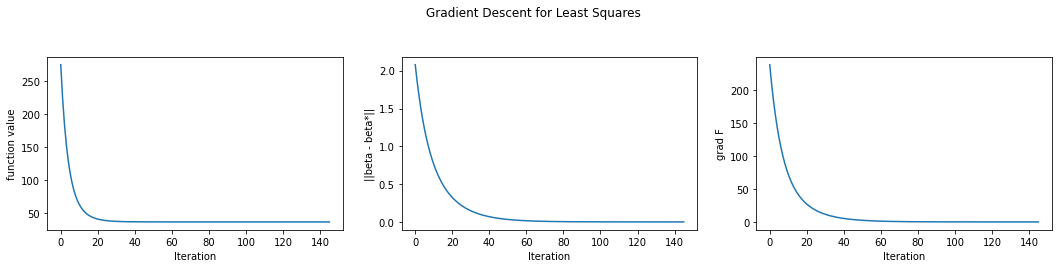

In [82]:
plot_opt_path(GD_beta, model, beta_solution, opt_algo) #differences = True

## Accelerated Gradient Descent

In [83]:
%%time
opt_algo = 'Accelerated Gradient Descent'

eta = 1/model.L_F

print(f'eta: {eta}')
AGD_beta = accelerated_gradient_descent(model, eta)['beta_history']

eta: 0.0009529706213182774
Accelerated Gradient Descent finished after 51 iterations
CPU times: user 2.47 ms, sys: 1.39 ms, total: 3.85 ms
Wall time: 2.71 ms


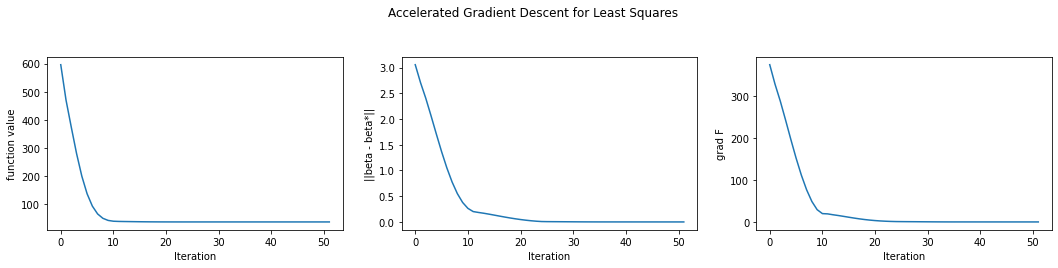

In [84]:
plot_opt_path(AGD_beta, model, beta_solution, opt_algo)

## Stochastic Gradient Descent

In [85]:
%%time
opt_algo = 'Stochastic Gradient Descent'

eta = 2/model.L_F

print(f'eta: {eta}')
SGD_beta = stochastic_gradient_descent(model, eta, epsilon=1e-10)['beta_history']

eta: 0.0019059412426365547
Stochastic Gradient Descent finished after 9999 iterations
CPU times: user 642 ms, sys: 31.9 ms, total: 674 ms
Wall time: 650 ms


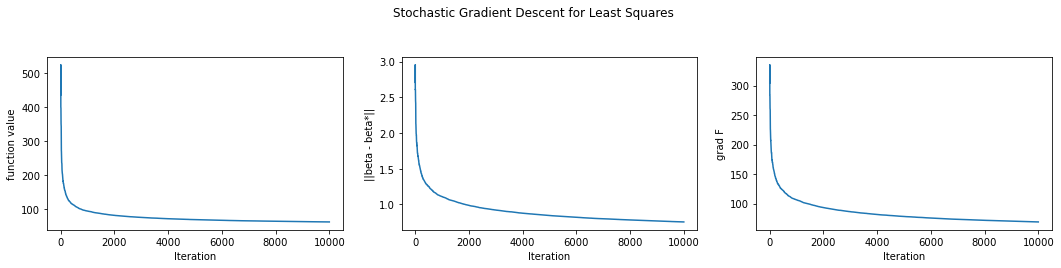

In [86]:
plot_opt_path(SGD_beta, model, beta_solution, opt_algo)

In [89]:
fun_history_gd, grad_history_gd, beta_error_gd = opt_history(model, GD_beta, beta_solution)
fun_history_agd, grad_history_agd, beta_error_agd = opt_history(model, AGD_beta, beta_solution)
fun_history_sgd, grad_history_sgd, beta_error_sgd = opt_history(model, SGD_beta, beta_solution)

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

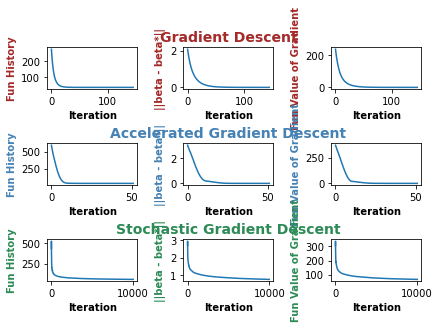

In [92]:
plt.figure(figsize=[18, 7])

fig, axs = plt.subplots(3, 3, constrained_layout = True)
axs[0, 0].plot(fun_history_gd)
axs[0, 1].plot(beta_error_gd)
axs[0, 1].set_title('Gradient Descent', fontsize=14, fontweight='bold', color = 'brown')
axs[0, 2].plot(grad_history_gd)
axs[1, 0].plot(fun_history_agd)
axs[1, 1].plot(beta_error_agd)
axs[1, 1].set_title('Accelerated Gradient Descent', fontsize=14, fontweight='bold', color = 'steelblue')
axs[1, 2].plot(grad_history_agd)
axs[2, 0].plot(fun_history_sgd)
axs[2, 1].plot(beta_error_sgd)
axs[2, 1].set_title('Stochastic Gradient Descent', fontsize=14, fontweight='bold', color = 'seagreen')
axs[2, 2].plot(grad_history_sgd)

for ax in axs.flat:
    ax.set(xlabel='Iteration')
    ax.xaxis.label.set_fontweight('heavy')

for ax in axs[0, 0], axs[1, 0], axs[2, 0]:
    ax.set(ylabel='Fun History')

for ax in axs[0, 1], axs[1, 1], axs[2, 1]:
    ax.set(ylabel='||beta - beta*||') 

for ax in axs[0, 2], axs[1, 2], axs[2, 2]:
    ax.set(ylabel='Fun Value of Gradient')

for ax in axs[0, 0], axs[0, 1], axs[0, 2]:
    #ax.set(ylabel='Fun History')
    ax.yaxis.label.set_color('brown')
    ax.yaxis.label.set_fontweight('bold')

for ax in axs[1, 0], axs[1, 1], axs[1, 2]:
    ax.yaxis.label.set_color('steelblue')
    ax.yaxis.label.set_fontweight('bold')

for ax in axs[2, 0], axs[2, 1], axs[2, 2]:
    ax.yaxis.label.set_color('seagreen')
    ax.yaxis.label.set_fontweight('bold')